In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 558.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 653.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 653.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 654.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 731.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 731.4 kB/s eta 0:00:02
   ----- --------------------

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('placement.csv')

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [9]:
df.shape

(100, 4)

In [10]:
#preprocess
df=df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
#EDA
import matplotlib.pyplot as plt

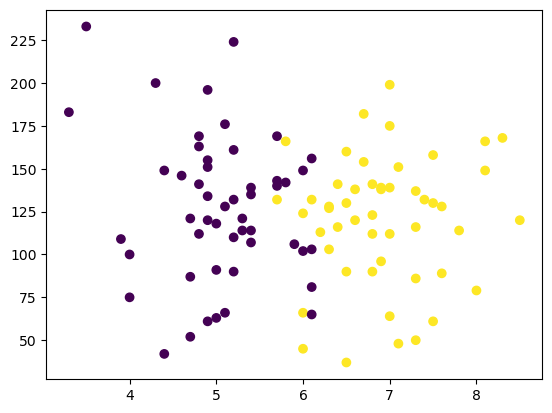

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
#Extract input and output cols
#cgpa and iq are independent
#x=independent

x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [15]:
#2Dtensor/matrix
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
#1Dtensor /vector
y.shape

(100,)

In [18]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [19]:
x_train

,cgpa,iq
5,7.1,48.0
68,4.0,75.0
33,6.0,149.0
41,5.4,114.0
73,4.9,61.0
...,...,...
2,5.3,121.0
92,5.2,110.0
65,8.1,166.0
96,4.4,42.0


In [20]:
y_train

5     1
68    0
33    0
41    0
73    0
     ..
2     0
92    0
65    1
96    0
84    0
Name: placement, Length: 90, dtype: int64

In [21]:
x_test

,cgpa,iq
93,6.8,112.0
27,6.0,124.0
32,7.0,139.0
35,6.8,90.0
75,4.8,169.0
48,6.6,138.0
19,5.2,132.0
50,3.5,233.0
53,8.3,168.0
57,6.5,130.0


In [22]:
#scale the values(-1to1)

from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train =scaler.fit_transform(x_train)

In [25]:
x_train

array([[ 1.00586329, -1.86225476],
       [-1.76174872, -1.17691794],
       [ 0.02380742,  0.70141263],
       [-0.51185942, -0.18698696],
       [-0.95824846, -1.53227777],
       [ 1.27369671,  0.26990426],
       [ 0.91658548, -0.23775265],
       [-0.95824846,  0.8537097 ],
       [-1.4939153 ,  1.99593775],
       [-1.13680407, -1.76072338],
       [-0.86897065, -1.48151208],
       [-1.04752626,  0.49834987],
       [ 0.47019645, -2.14146606],
       [-0.06547039, -0.39004973],
       [-0.77969284,  0.16837288],
       [ 1.45225232, -0.8215581 ],
       [-0.1547482 ,  1.132921  ],
       [ 1.45225232,  0.16837288],
       [ 0.29164084,  0.16837288],
       [-0.86897065, -0.08545558],
       [ 0.11308522,  0.26990426],
       [ 1.36297452,  0.21913857],
       [ 0.82730768, -0.64387818],
       [ 1.1844189 ,  0.39681848],
       [-1.13680407, -0.87232379],
       [ 0.11308522, -1.02462086],
       [-0.51185942,  0.34605279],
       [-1.13680407, -0.00930704],
       [ 0.47019645,

In [26]:
x_test = scaler.fit_transform(x_test)

In [27]:
x_test

array([[ 0.50935371, -0.84609885],
       [-0.11754316, -0.52377548],
       [ 0.66607793, -0.12087126],
       [ 0.50935371, -1.43702503],
       [-1.05788848,  0.68493716],
       [ 0.35262949, -0.14773155],
       [-0.74444004, -0.30889323],
       [-2.0765959 ,  2.40399515],
       [ 1.68478535,  0.65807688],
       [ 0.27426738, -0.36261379]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf=LogisticRegression()

In [30]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [31]:
#:Evaluate the model/model selection
y_pred=clf.predict(x_test)

In [32]:
y_test

93    1
27    1
32    1
35    1
75    0
48    1
19    0
50    0
53    1
57    1
Name: placement, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.9

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

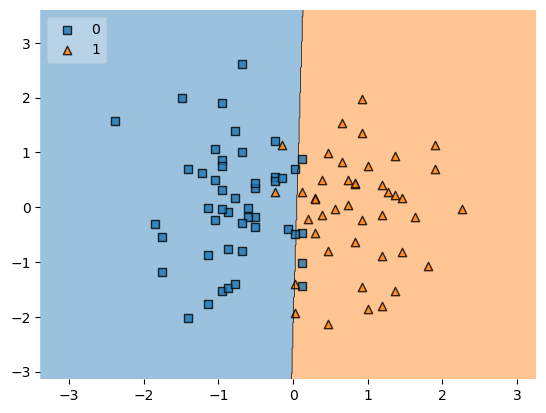

In [36]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [37]:
#(obj convert to file)
import pickle

In [39]:
pickle.dump(clf,open('model.pkl','wb'))